<a href="https://colab.research.google.com/github/swarnimam/ML_junk/blob/master/Game_Of_Thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Game of Thrones** is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books.





This dataset constitutes a network and is given as a text file describing the edges between characters, with some attributes attached to each edge. Let's start by loading in the data for the first book A Game of Thrones and inspect it.

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
import networkx as nx

In [14]:
book1=pd.read_csv('/content/book1.csv')
book2=pd.read_csv('/content/book2.csv')
book3=pd.read_csv('/content/book3.csv')
book4=pd.read_csv('/content/book4.csv')
book5=pd.read_csv('/content/book5.csv')
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [15]:
books=[book1,book2,book3,book4,book5]
G_books=[]
for book in books:
  G_book=nx.Graph()
  for _,edge in book.iterrows():
    G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
  G_books.append(G_book)
G_books[0]

In [0]:
# For graph visualization
#nx.draw_networkx(G_books[0])
#nx.draw_networkx(G_books[1])
#nx.draw_networkx(G_books[2])
#nx.draw_networkx(G_books[3])
#nx.draw_networkx(G_books[4])

In [16]:
deg_cen_book1 = nx.degree_centrality(G_books[0])
deg_cen_book2 = nx.degree_centrality(G_books[1])
deg_cen_book3 = nx.degree_centrality(G_books[2])
deg_cen_book4 = nx.degree_centrality(G_books[3])
deg_cen_book5 = nx.degree_centrality(G_books[4])
deg_cen_book1

{'Addam-Marbrand': 0.010752688172043012,
 'Aegon-I-Targaryen': 0.010752688172043012,
 'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054,
 'Aerys-II-Targaryen': 0.03225806451612903,
 'Aggo': 0.03225806451612903,
 'Albett': 0.016129032258064516,
 'Alliser-Thorne': 0.05376344086021506,
 'Alyn': 0.02688172043010753,
 'Arthur-Dayne': 0.005376344086021506,
 'Arya-Stark': 0.14516129032258066,
 'Arys-Oakheart': 0.005376344086021506,
 'Balon-Greyjoy': 0.010752688172043012,
 'Balon-Swann': 0.010752688172043012,
 'Barristan-Selmy': 0.07526881720430108,
 'Benjen-Stark': 0.07526881720430108,
 'Beric-Dondarrion': 0.03225806451612903,
 'Boros-Blount': 0.02688172043010753,
 'Bowen-Marsh': 0.02688172043010753,
 'Bran-Stark': 0.17204301075268819,
 'Brandon-Stark': 0.03225806451612903,
 'Bronn': 0.05376344086021506,
 'Brynden-Tully': 0.05913978494623656,
 'Catelyn-Stark': 0.23118279569892475,
 'Cayn': 0.016129032258064516,
 'Cersei-Lannister': 0.16129032258064518,
 'Chella': 0.005376344086021506,
 '

In [0]:
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]
sorted_deg_cen_book2 = sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:10]
sorted_deg_cen_book3 = sorted(deg_cen_book3.items(), key=lambda x:x[1], reverse=True)[0:10]
sorted_deg_cen_book4 = sorted(deg_cen_book4.items(), key=lambda x:x[1], reverse=True)[0:10]
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

In [18]:
sorted_deg_cen_book1

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

In [19]:
sorted_deg_cen_book5

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544),
 ('Cersei-Lannister', 0.08860759493670886),
 ('Barristan-Selmy', 0.07911392405063292),
 ('Hizdahr-zo-Loraq', 0.06962025316455696),
 ('Asha-Greyjoy', 0.056962025316455694),
 ('Melisandre', 0.05379746835443038)]

In [24]:
%matplotlib inline
evol = [nx.degree_centrality(book) for book in G_books]
degree_centrality_df = pd.DataFrame.from_records(evol)
degree_centrality_df.head()

,Addam-Marbrand,Jaime-Lannister,Tywin-Lannister,Aegon-I-Targaryen,Daenerys-Targaryen,Eddard-Stark,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Bowen-Marsh,Chett,Clydas,Jeor-Mormont,Jon-Snow,Samwell-Tarly,Aerys-II-Targaryen,Brandon-Stark,Gerold-Hightower,Jon-Arryn,Robert-Baratheon,Aggo,Drogo,Jhogo,Jorah-Mormont,Quaro,Rakharo,Albett,Halder,Rast,Grenn,Pypar,Tyrion-Lannister,Alyn,Harwin,Jory-Cassel,Tomard,Arthur-Dayne,Arya-Stark,Benjen-Stark,Bran-Stark,Catelyn-Stark,...,Leathers,Rory,Harl,Myles-Toyne,Harwood-Stout,Marghaz-zo-Loraq,Rowan,Hoster-Blackwood,Hother-Umber,Rhaegar-Frey,Squirrel,Nyessos-Vhassar,Patrek-of-Kings-Mountain,Soren-Shieldbreaker,Tom-Barleycorn,Toregg,Ulmer,Wun-Weg-Wun-Dar-Wun,Nurse,Richard-Horpe,Kerwin,Longwater-Pyke,Luton,Lyanna-Mormont,Malaquo-Maegyr,Rodrik-Sparr,Morgo,Yezzan-zo-Qaggaz,Old-Bill-Bone,Sweets,Yellow-Dick,Walda-Frey-(daughter-of-Merrett),Roose-Ryswell,Scar,Shrouded-Lord,Theomore,William-Foxglove,Willow-Witch-eye,Thistle,Wulfe
0,0.010753,0.155914,0.118280,0.010753,0.112903,0.354839,0.037634,0.053763,0.026882,0.016129,0.005376,0.069892,0.198925,0.064516,0.032258,0.032258,0.026882,0.080645,0.268817,0.032258,0.102151,0.032258,0.069892,0.026882,0.026882,0.016129,0.043011,0.032258,0.037634,0.037634,0.247312,0.026882,0.021505,0.112903,0.037634,0.005376,0.145161,0.075269,0.172043,0.231183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.081395,0.065891,0.019380,0.069767,0.085271,0.023256,0.015504,NaN,0.003876,NaN,0.058140,0.108527,0.023256,0.019380,NaN,NaN,NaN,0.100775,0.019380,0.015504,0.015504,0.038760,NaN,0.011628,NaN,NaN,NaN,0.011628,NaN,0.205426,NaN,NaN,NaN,NaN,NaN,0.155039,0.003876,0.116279,0.127907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.026490,0.149007,0.096026,0.009934,0.079470,0.052980,0.059603,0.023179,0.033113,0.016556,0.013245,0.059603,0.172185,0.099338,0.029801,0.009934,0.013245,0.009934,0.086093,0.006623,0.013245,0.009934,0.039735,NaN,0.009934,NaN,0.006623,NaN,0.039735,0.039735,0.195364,NaN,0.023179,NaN,NaN,0.016556,0.122517,0.013245,0.056291,0.125828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.014652,0.234432,0.058608,NaN,NaN,0.029304,0.025641,NaN,NaN,NaN,0.007326,0.007326,0.040293,0.073260,0.032967,NaN,NaN,0.021978,0.047619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007326,0.007326,0.095238,NaN,NaN,NaN,NaN,NaN,0.058608,NaN,0.014652,0.040293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.031646,0.028481,0.003165,0.183544,0.044304,0.015823,0.003165,0.028481,NaN,0.015823,0.006329,0.196203,0.012658,0.009494,NaN,NaN,NaN,0.047468,0.018987,0.006329,0.022152,0.012658,NaN,0.018987,NaN,NaN,NaN,0.006329,0.009494,0.104430,NaN,NaN,NaN,NaN,NaN,0.037975,0.003165,0.037975,0.003165,...,0.015823,0.006329,0.003165,0.006329,0.003165,0.003165,0.015823,0.003165,0.012658,0.006329,0.012658,0.006329,0.012658,0.003165,0.003165,0.009494,0.003165,0.012658,0.012658,0.006329,0.003165,0.003165,0.003165,0.003165,0.003165,0.006329,0.003165,0.015823,0.003165,0.009494,0.009494,0.006329,0.003165,0.006329,0.003165,0.006329,0.003165,0.003165,0.003165,0.003165


In [25]:
degree_centrality_df[['Arya-Stark','Jon-Snow']]

,Arya-Stark,Jon-Snow
0,0.145161,0.198925
1,0.155039,0.108527
2,0.122517,0.172185
3,0.058608,0.040293
4,0.037975,0.196203


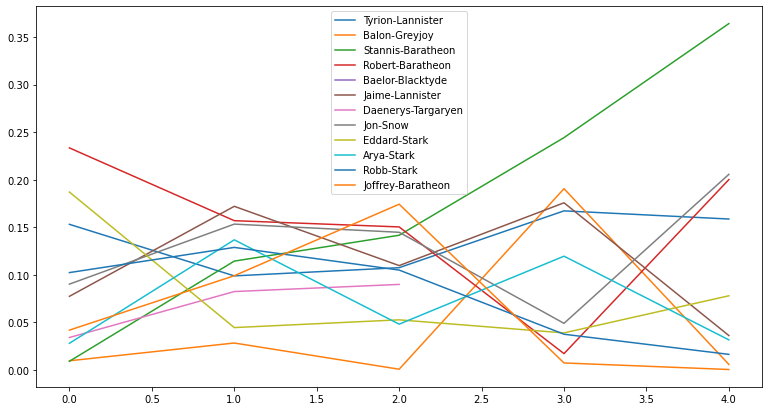

In [35]:
evol = [nx.betweenness_centrality(book, weight='weight') for book in G_books]
betweenness_centrality_df=pd.DataFrame.from_records(evol)
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_centrality_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)
betweenness_centrality_df[list_of_char].plot(figsize=(13, 7))

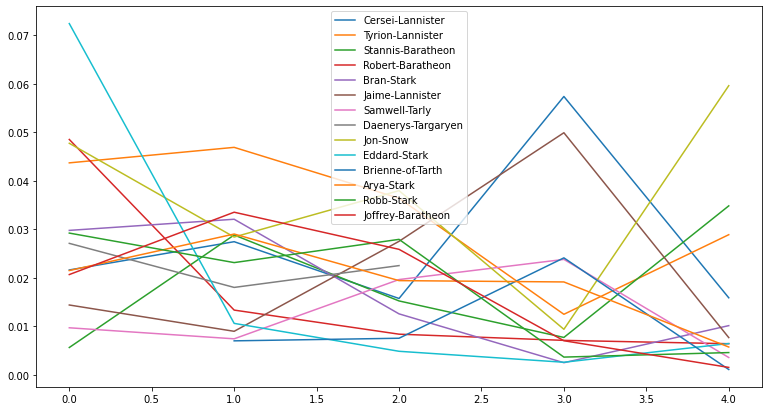

In [36]:
evol = [nx.pagerank(book) for book in G_books]
pagerank_df=evol = pd.DataFrame.from_records(evol)
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)
pagerank_df[list_of_char].plot(figsize=(13, 7))

In [40]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(G_books[4]), nx.betweenness_centrality(G_books[4], weight='weight'), nx.degree_centrality(G_books[4])]
# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


In [0]:
# Finding the most important character in the fifth book according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

In [42]:
p_rank

'Jon-Snow'

In [43]:
b_cent

'Stannis-Baratheon'

In [44]:
d_cent

'Jon-Snow'

**And yet she said, " You know nothing, Jon Snow"**